# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.spatial import distance
from IPython.display import display, clear_output
import time 
import sys
%matplotlib inline
euclid = distance.euclidean

In [2]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [3]:
min_float = 2.2250738585072014*10**-308

In [4]:
min_float

2.2250738585072014e-308

In [5]:
euclid(2,1)

1.0

In [6]:
euclid?

In [7]:
sqrt((1-4)**2+(2-4)**2)

3.605551275463989

In [10]:
class particle():
    
    
    def __init__(self,identity,bound=False,p=False,v=False,color=False,dt=False,seed=False,crsec=False):
        self.identity = identity
        self.bound = bound
        self.couacc = []
        self.gravacc = []
        self.radii = []
        self.radv = []
        self.xlist = []
        self.ylist = []
        if seed == False:
            pass
        else:
            np.random.seed(seed)
        if identity == 'electron':
            self.charge = -1.602*10**(-19)
            self.mass = 9.109*10**(-31)
            self.color = 'blue'
        elif identity == 'proton':
            self.charge = 1.602*10**(-19)
            self.mass = 1.673*10**(-27)
            self.color = 'red'
        elif identity == 'neutron':
            self.charge = 0
            self.mass = 1.675*10**(-27)
            self.color = 'orange'
        elif identity == 'alpha':
            self.charge = 2*1.602*10**(-19)
            self.mass = 2*1.673*10**(-27) + 2*1.675*10**(-27)
            
        else:
            self.charge = identity[0]
            self.mass = identity[1]
            
        if p == False:
            
            self.x = np.random.uniform(-bound+min_float,bound)
            self.y = np.random.uniform(-bound+min_float,bound)
        
        if p != False:
            self.x = p[0]
            self.y = p[1]
        
        if v == False:
            self.dx = np.random.uniform(-bound+min,bound)/10.
            self.dy = np.random.random(-bound+min,bound)/10.
            
        if v != False:
            self.dx = v[0]
            self.dy = v[1]
        mu = 4*pi*10**(-7)
        #B = 
        #self.B = mu/(4*pi)*
        if dt == False:
            self.dt = 0.01
            
        else:
            self.dt = dt
        
        if color != False:
            self.color = color
            
        self.crsec = crsec
    def potential(self,alpha,offset=[0,0]):
        Fx = alpha/(sqrt(euclid(self.x,offset[0])**2+euclid(self.y,offset[1])**2))**2*(self.x-offset[0])
        Fy = alpha/(sqrt(self.x**2+self.y**2))**2*(self.y-offset[1])
    
        self.dx += self.dt*Fx/self.mass
        self.dy += self.dt*Fy/self.mass
        
    def coulomb(self,part2):
        k = 8.99*10**(9)
        
        
        Fcr = k*self.charge*part2.charge/(sqrt(euclid(self.x,part2.x)**2+euclid(self.y,part2.y)**2))**2
        Fcx = k*self.charge*part2.charge/(sqrt(euclid(self.x,part2.x)**2+euclid(self.y,part2.y)**2))**3*(self.x-part2.x)
        Fcy = k*self.charge*part2.charge/(sqrt(euclid(self.x,part2.x)**2+euclid(self.y,part2.y)**2))**3*(self.y-part2.y)
        
        self.dx += self.dt*Fcx/self.mass
        self.dy += self.dt*Fcy/self.mass
        
        self.couacc.append(Fcr/self.mass)
        self.radii.append(sqrt((self.x-part2.x)**2+(self.y-part2.y)**2))
        
    def gravitation(self,part2):
        G = -6.674*10**(-11)
        Fgr = G*self.mass*part2.mass/(sqrt(euclid(self.x,part2.x)**2+euclid(self.y,part2.y)**2))**2
        Fgx = G*self.mass*part2.mass/(sqrt(euclid(self.x,part2.x)**2+euclid(self.y,part2.y)**2))**3*(self.x-part2.x)
        Fgy = G*self.mass*part2.mass/(sqrt(euclid(self.x,part2.x)**2+euclid(self.y,part2.y)**2))**3*(self.y-part2.y)
        
        self.dx += self.dt*Fgx/self.mass
        self.dy += self.dt*Fgy/self.mass
        
        self.gravacc.append(Fgr/self.mass)
        self.radii.append(sqrt((self.x-part2.x)**2+(self.y-part2.y)**2))
    
    def magnetic(self,part2):
        
        
        pass
    
    def increment_time(self):
        self.x = self.x + self.dx
        self.y = self.y + self.dy
        if self.bound == False:
            pass
        else:
        
            if (self.x < -self.bound):
                self.x = -(self.bound + min_float)
                self.dx = -1 * self.dx
            if (self.y < -self.bound):
                self.y = -(self.bound + min_float)
                self.dy = -1 * self.dy
            if (self.x > self.bound):
                self.x = self.bound - (self.x-self.bound)
                self.dx = -1 * self.dx
            if (self.y > self.bound):
                self.y = self.bound -(self.y-self.bound)
                self.dy = -1 * self.dy
        self.xlist.append(self.x)
        self.ylist.append(self.y)
        
    #def collision(self,)
    def draw(self):
        
        plt.scatter(self.x, self.y,color=self.color,label=self.identity)
            
        
            
        plt.plot([self.x-self.dx, self.x], [self.y-self.dy, self.y],color=self.color)
        if self.bound == False:
            pass
        else:
            plt.axis([-self.bound, self.bound, -self.bound, self.bound])
        plt.legend()

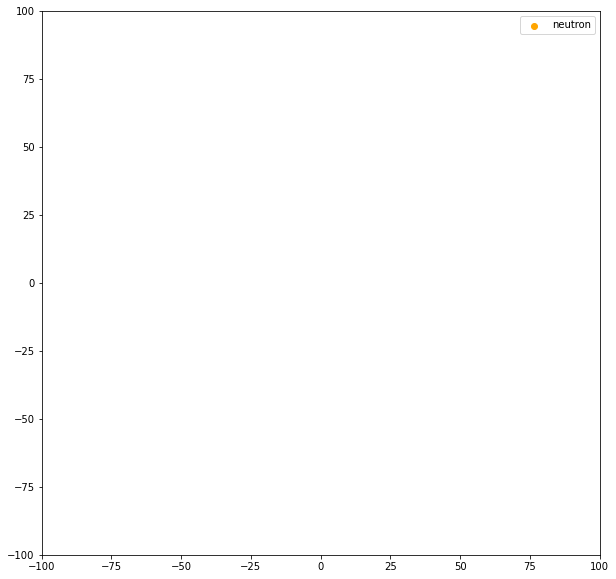

<Figure size 720x720 with 0 Axes>

In [11]:
# Potential WIP

fig,ax = plt.subplots(figsize=(10,10))
newt = particle(identity='neutron',bound=100,v=[-2,2])

for i in range(500):
    newt.draw()
    newt.potential(alpha=10^(-30),offset=[25,-25])
    newt.increment_time()
    clear_output(wait=True)
    display(fig)
    fig.clear()
    time.sleep(0.0001)

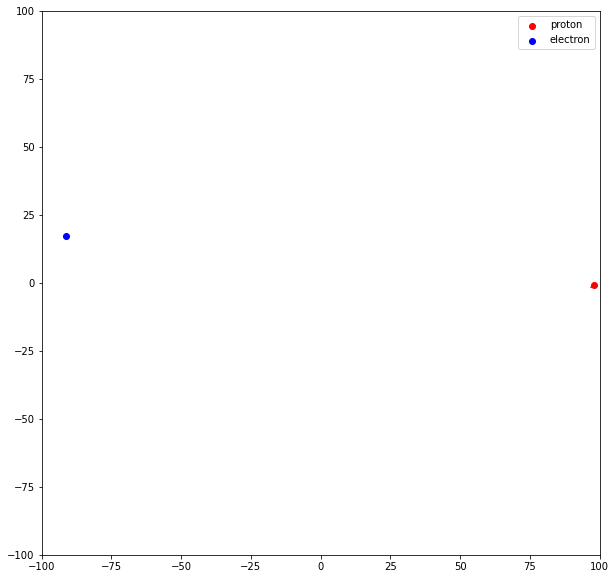

<Figure size 720x720 with 0 Axes>

In [12]:
fig,ax = plt.subplots(figsize=(10,10))
prot = particle(identity='proton',bound=100,p=[0,0],v=[1,0.8])
prot2 = particle(identity='electron',bound=100,p=[30,30],v=[-1/10,-1/10])

for i in range(500):
    prot.draw()
    prot2.draw()
    prot.coulomb(prot2)
    prot2.coulomb(prot)
    prot.increment_time()
    prot2.increment_time()
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots
    time.sleep(0.0001)

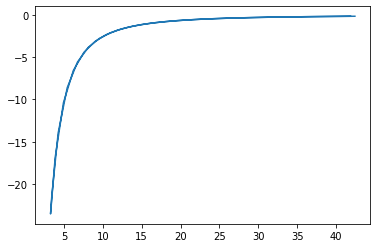

In [19]:
plt.plot(prot2.radii,prot2.couacc)

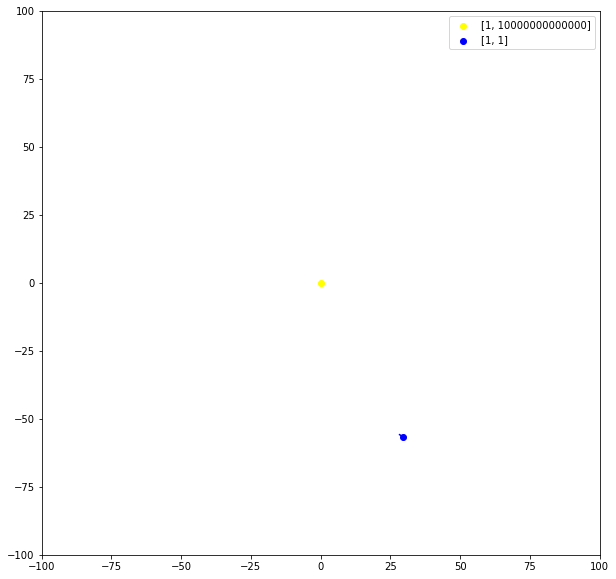

<Figure size 720x720 with 0 Axes>

In [13]:
# Hyperbolic gravitational orbit

fig,ax = plt.subplots(figsize=(10,10))
prot = particle(identity=[1,10**13],bound=100,p=[0,0],v=[0,0],color='yellow',dt=0.01)
prot2 = particle(identity=[1,1],bound=100,p=[25,25],v=[-1,-0.8],color='blue',dt=0.01)
for i in range(500):

    prot.draw()
    prot2.draw()
    prot.gravitation(prot2)
    prot2.gravitation(prot)
    prot.increment_time()
    prot2.increment_time()
    clear_output(wait=True)
    display(fig)
    fig.clear()
    time.sleep(prot.dt)

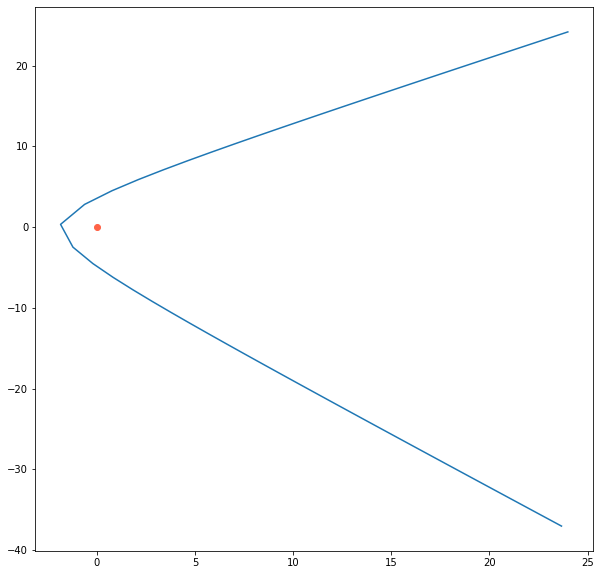

In [37]:
plt.figure(figsize=(10,10))
plt.plot(prot2.xlist,prot2.ylist)
plt.scatter(0,0,color='tomato')

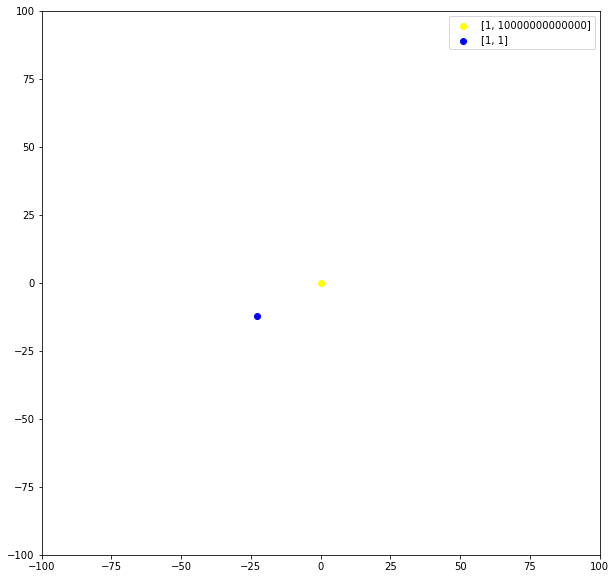

<Figure size 720x720 with 0 Axes>

In [14]:
# Eliptical gravitational orbit

fig,ax = plt.subplots(figsize=(10,10))
prot = particle(identity=[1,10**13],bound=100,p=[0,0],v=[0,0],color='yellow',dt=0.01)
prot2 = particle(identity=[1,1],bound=100,p=[10,0],v=[0,-1],color='blue',dt=0.01)
for i in range(500):

    prot.draw()
    prot2.draw()
    prot.gravitation(prot2)
    prot2.gravitation(prot)
    prot.increment_time()
    prot2.increment_time()
    clear_output(wait=True)
    display(fig)
    fig.clear()
    time.sleep(prot.dt)

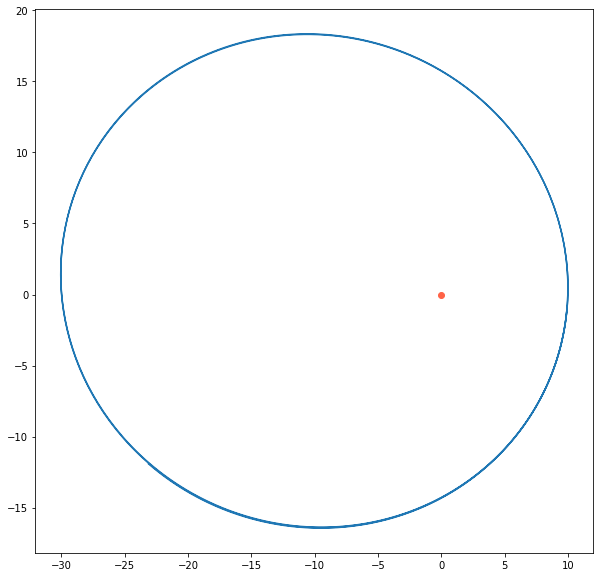

In [39]:
plt.figure(figsize=(10,10))
plt.plot(prot2.xlist,prot2.ylist)
plt.scatter(0,0,color='tomato')

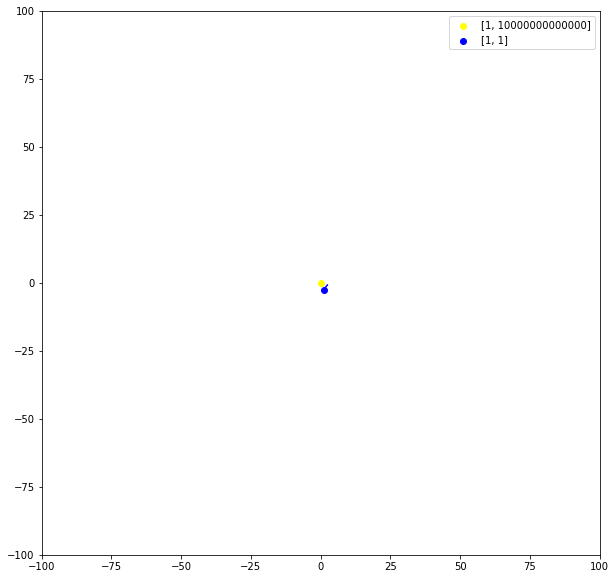

<Figure size 720x720 with 0 Axes>

In [15]:
# Eliptical gravitational orbit with precession

fig,ax = plt.subplots(figsize=(10,10))
prot = particle(identity=[1,10**13],bound=100,p=[0,0],v=[0,0],color='yellow',dt=0.01)
prot2 = particle(identity=[1,1],bound=100,p=[10,0],v=[0,-0.5],color='blue',dt=0.01)
for i in range(500):

    prot.draw()
    prot2.draw()
    prot.gravitation(prot2)
    prot2.gravitation(prot)
    prot.increment_time()
    prot2.increment_time()
    clear_output(wait=True)
    display(fig)
    fig.clear()
    time.sleep(prot.dt)

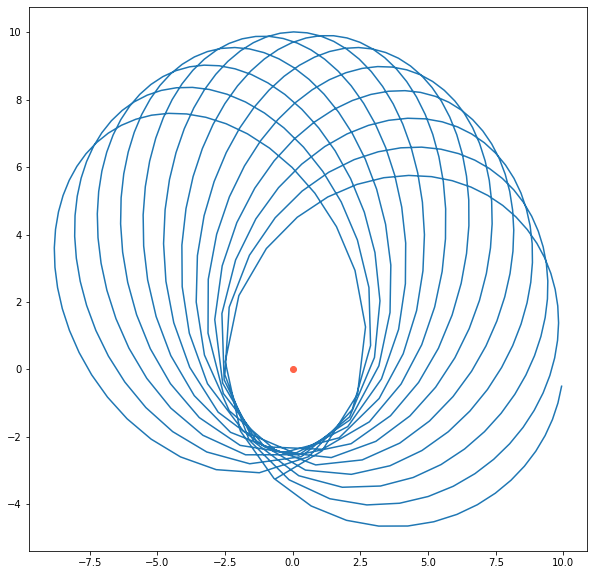

In [41]:
plt.figure(figsize=(10,10))
plt.plot(prot2.xlist,prot2.ylist)
plt.scatter(0,0,color='tomato')

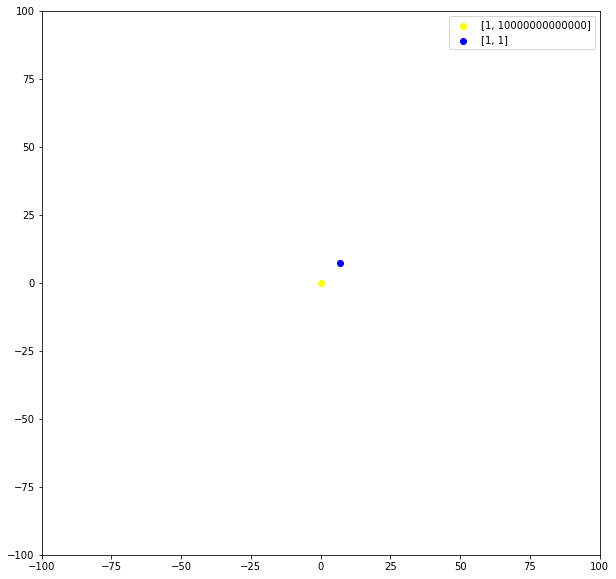

<Figure size 720x720 with 0 Axes>

In [16]:
# Circular orbit

fig,ax = plt.subplots(figsize=(10,10))
prot = particle(identity=[1,10**13],bound=100,p=[0,0],v=[0,0],color='yellow',dt=0.01)
prot2 = particle(identity=[1,1],bound=100,p=[10,0],v=[0,-0.8],color='blue',dt=0.01)
for i in range(500):

    prot.draw()
    prot2.draw()
    prot.gravitation(prot2)
    prot2.gravitation(prot)
    prot.increment_time()
    prot2.increment_time()
    clear_output(wait=True)
    display(fig)
    fig.clear()
    time.sleep(prot.dt)

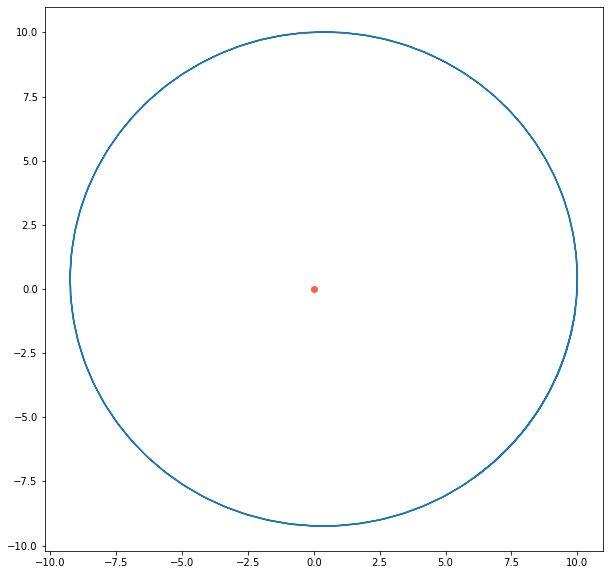

In [31]:
plt.figure(figsize=(10,10))
plt.plot(prot2.xlist,prot2.ylist)
plt.scatter(0,0,color='tomato')

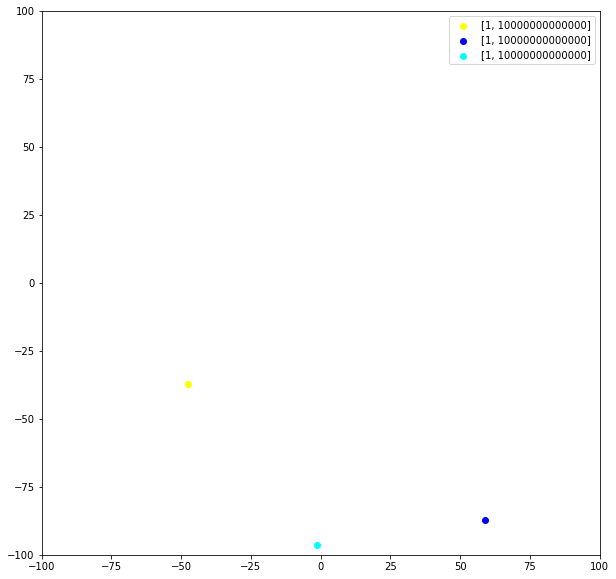

<Figure size 720x720 with 0 Axes>

In [17]:
# Three-body gravitational orbit

fig,ax = plt.subplots(figsize=(10,10))
prot = particle(identity=[1,10**13],bound=100,p=[20,-20],v=[0,0.6],color='yellow',dt=0.01)
prot2 = particle(identity=[1,10**13],bound=100,p=[15,25],v=[-0.5,-0.2],color='blue',dt=0.01)
prot3 = particle(identity=[1,10**13],bound=100,p=[-25,0],v=[0.5,-0.2],color='aqua',dt=0.01)
for i in range(500):

    prot.draw()
    prot2.draw()
    prot3.draw()
    prot.gravitation(prot2)
    prot.gravitation(prot3)
    prot2.gravitation(prot)
    prot2.gravitation(prot3)
    prot3.gravitation(prot)
    prot3.gravitation(prot2)
    prot.increment_time()
    prot2.increment_time()
    prot3.increment_time()
    clear_output(wait=True)
    display(fig)
    fig.clear()
    time.sleep(prot.dt)

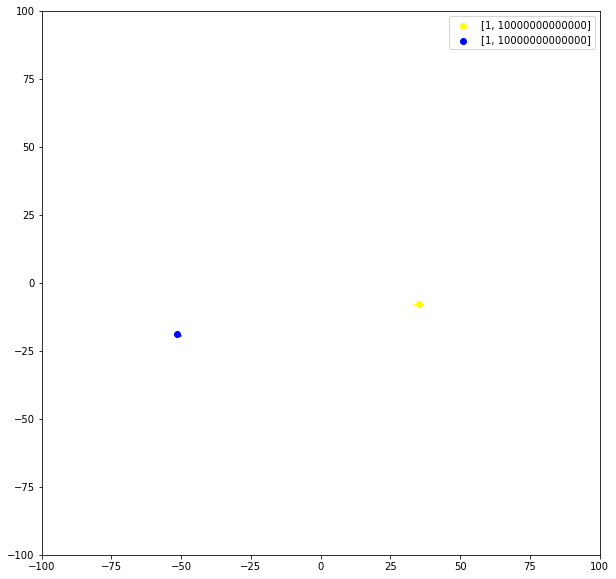

<Figure size 720x720 with 0 Axes>

In [18]:
# Two-Body gravitational orbit, one body stationary

fig,ax = plt.subplots(figsize=(10,10))
prot = particle(identity=[1,10**13],bound=100,p=[0,0],v=[0,0],color='yellow',dt=0.01)
prot2 = particle(identity=[1,10**13],bound=100,p=[25,25],v=[-1,-0.8],color='blue',dt=0.01)
for i in range(500):

    prot.draw()
    prot2.draw()
    prot.gravitation(prot2)
    prot2.gravitation(prot)
    prot.increment_time()
    prot2.increment_time()
    clear_output(wait=True)
    display(fig)
    fig.clear()
    time.sleep(prot.dt)

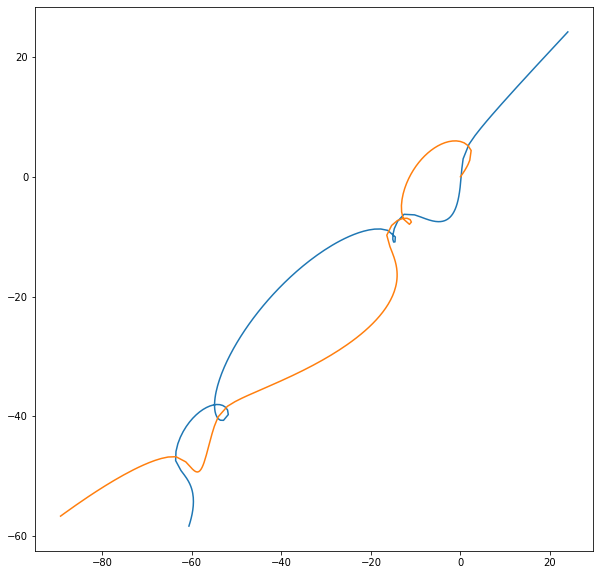

In [75]:
plt.figure(figsize=(10,10))
plt.plot(prot2.xlist,prot2.ylist)
plt.plot(prot.xlist,prot.ylist)

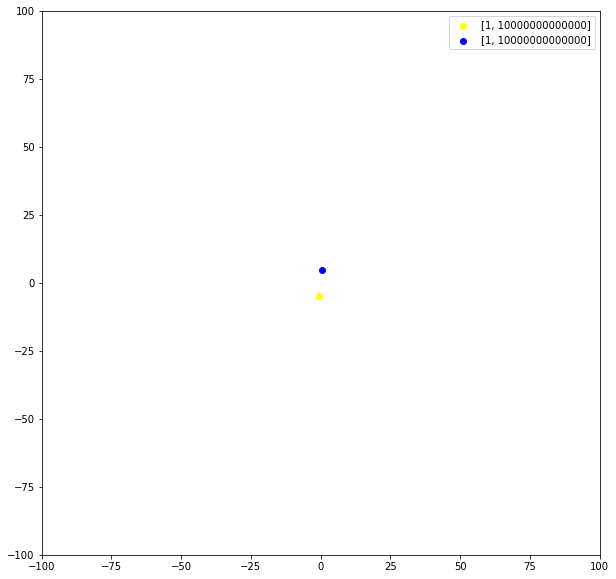

<Figure size 720x720 with 0 Axes>

In [19]:
# Two-body coupled gravitational orbit

fig,ax = plt.subplots(figsize=(10,10))
prot = particle(identity=[1,10**13],bound=100,p=[-5,0],v=[0,0.5],color='yellow',dt=0.01)
prot2 = particle(identity=[1,10**13],bound=100,p=[5,0],v=[-0,-0.5],color='blue',dt=0.01)
for i in range(500):

    prot.draw()
    prot2.draw()
    prot.gravitation(prot2)
    prot2.gravitation(prot)
    prot.increment_time()
    prot2.increment_time()
    clear_output(wait=True)
    display(fig)
    fig.clear()
    time.sleep(prot.dt)

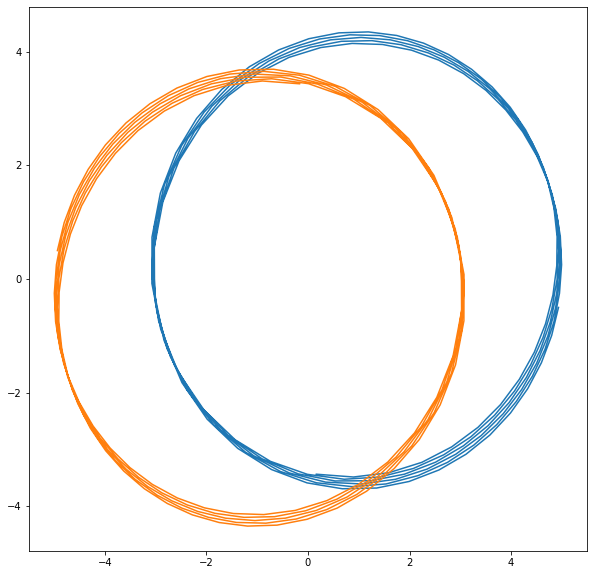

In [73]:
plt.figure(figsize=(10,10))
plt.plot(prot2.xlist,prot2.ylist)
plt.plot(prot.xlist,prot.ylist)